In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from audioop import maxpp
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [13]:
# animelists_cleaned = pd.read_csv('database/animelists_cleaned.csv')
users_cleaned = pd.read_csv('database/users_cleaned.csv')
anime_cleaned = pd.read_csv('database/anime_cleaned.csv')

In [5]:
# let's try to get a better understanding of the data with clustering

users_cleaned.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701
3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697
4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847


In [11]:
# let's get some understanding of the users
# note the user_days_spent_watching label keeps track of how much time the user has spent watching anime
# we could use this for clustering

users_cleaned.describe()

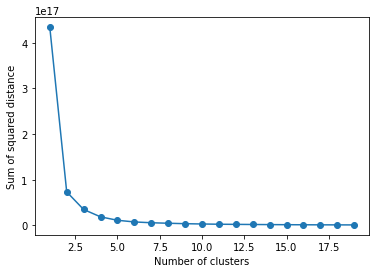

In [20]:
# lets try to get clusters of users
# we will use the k-means algorithm

# let's put user_days_spent_watching as the first column
users_cleaned_2 = users_cleaned.drop('username', axis=1).drop("access_rank", axis=1).drop("birth_date", axis=1).drop("join_date", axis=1).drop("last_online", axis=1).drop('location', axis=1)


# one-hot encoding
users_cleaned_2 = pd.get_dummies(users_cleaned_2, columns=["gender"])
users_cleaned_2.head()


# how many clusters do we want?
# we will use the elbow method to find the optimal number of clusters

sse = []

clusters = range(1, 20)

for k in clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(users_cleaned_2)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()




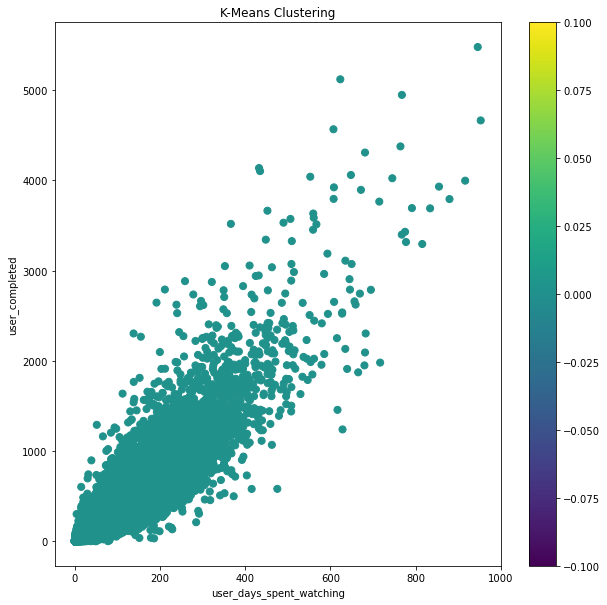

In [25]:
# scatter plot

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(users_cleaned_2['user_days_spent_watching'], users_cleaned_2['user_completed'], c=labels, s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('user_days_spent_watching')
ax.set_ylabel('user_completed')
plt.colorbar(scatter)